<a href="https://colab.research.google.com/github/Fediarta/psd/blob/main/Timeseries_perak1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdown
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Download CSV file
url = 'https://drive.google.com/uc?id=1c9QkcnFTeLvhR5SqMZeczS6CVDYB3GGz'
output = 'Data Historis Perak Berjangka.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1c9QkcnFTeLvhR5SqMZeczS6CVDYB3GGz
To: /content/Data Historis Perak Berjangka.csv
100%|██████████| 81.9k/81.9k [00:00<00:00, 47.8MB/s]


'Data Historis Perak Berjangka.csv'

In [ ]:
# Load the data
df_asli = pd.read_csv('Data Historis Perak Berjangka.csv')

df_asli.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,11/10/2024,"31,747","31,380","31,802","31,260",NaN,"1,62%"
1,10/10/2024,"31,240","30,710","31,400","30,570",NaN,"1,86%"
2,09/10/2024,"30,670","30,860","31,005","30,435","52,15K","0,23%"
3,08/10/2024,"30,600","31,945","32,020","30,345","96,75K","-4,39%"
4,07/10/2024,"32,004","32,450","32,595","31,655","55,63K","-1,20%"


In [ ]:
print(df_asli.columns)
num_rows = df_asli.shape[0]
print(f"Jumlah baris dalam dataframe: {num_rows}")

Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')
Jumlah baris dalam dataframe: 1243


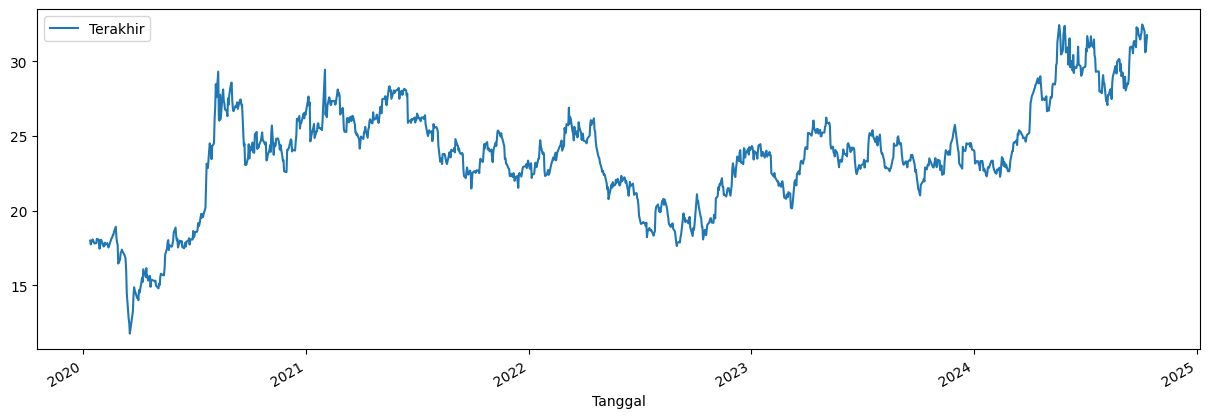

In [ ]:
#Plotting data
df_asli['Tanggal'] = pd.to_datetime(df_asli['Tanggal'], dayfirst=True, format='%d/%m/%Y')
df_asli.set_index('Tanggal', inplace=True)
df_asli['Terakhir'] = df_asli['Terakhir'].astype(str).str.replace(',', '.', regex=False).astype(float)
df_asli.plot(figsize=(15, 5))
plt.show()

In [ ]:
# Check data hilang
print(f"Jumlah data yang hilang: {df_asli['Terakhir'].isnull().sum()}")
# Handle missing values (e.g., forward fill)
#df_asli['Terakhir'].fillna(method='ffill', inplace=True)

Jumlah data yang hilang: 0


In [ ]:
# Normalisasi
scaler = MinMaxScaler()
df_asli['Terakhir_Normalized'] = scaler.fit_transform(df_asli[['Terakhir']])
df_asli.head()


,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Terakhir_Normalized
Tanggal,,,,,,,
2024-10-11,31.747,"31,380","31,802","31,260",NaN,"1,62%",0.965349
2024-10-10,31.240,"30,710","31,400","30,570",NaN,"1,86%",0.940847
2024-10-09,30.670,"30,860","31,005","30,435","52,15K","0,23%",0.913300
2024-10-08,30.600,"31,945","32,020","30,345","96,75K","-4,39%",0.909917
2024-10-07,32.004,"32,450","32,595","31,655","55,63K","-1,20%",0.977769


In [ ]:
import joblib

# Contoh scaler yang telah digunakan
scaler = MinMaxScaler()

# Menyimpan scaler ke file
joblib.dump(scaler, 'minmax_scaler.pkl')
print("Scaler telah disimpan ke file 'minmax_scaler.pkl'")


Scaler telah disimpan ke file 'minmax_scaler.pkl'


In [ ]:
terakhir = df_asli[['Terakhir']]
terakhir.head()

,Terakhir
Tanggal,
2024-10-11,31.747
2024-10-10,31.240
2024-10-09,30.670
2024-10-08,30.600
2024-10-07,32.004


In [ ]:
terakhir_normalized = df_asli[['Terakhir_Normalized']]
terakhir_normalized.head()

,Terakhir_Normalized
Tanggal,
2024-10-11,0.965349
2024-10-10,0.940847
2024-10-09,0.913300
2024-10-08,0.909917
2024-10-07,0.977769


In [ ]:
# membuat sliding window
def sliding_window_embedded(data, lags, target_column='Terakhir_Normalized'):
    result = pd.DataFrame(data[target_column])
    for lag in lags:
        result[f't-{lag}'] = data[target_column].shift(lag)

    df_windowed = pd.concat([data, result.iloc[:, 1:]], axis=1)  # Concatenate with original DataFrame
    df_windowed.dropna(inplace=True)

    return df_windowed

In [ ]:
#  sliding window
lags = [1, 2, 3]
df_windowed = sliding_window_embedded(df_asli, lags)
df_windowed.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Terakhir_Normalized,t-1,t-2,t-3
Tanggal,,,,,,,,,,
2024-10-08,30.600,"31,945","32,020","30,345","96,75K","-4,39%",0.909917,0.913300,0.940847,0.965349
2024-10-07,32.004,"32,450","32,595","31,655","55,63K","-1,20%",0.977769,0.909917,0.913300,0.940847
2024-10-04,32.394,"32,290","33,225","31,755","86,41K","-0,22%",0.996617,0.977769,0.909917,0.913300
2024-10-03,32.464,"32,100","32,485","31,650","56,40K","1,70%",1.000000,0.996617,0.977769,0.909917
2024-10-02,31.920,"31,705","32,590","31,260","71,06K","0,56%",0.973710,1.000000,0.996617,0.977769


In [ ]:
lags_columns = df_windowed[['t-1', 't-2', 't-3','Terakhir_Normalized']]
lags_columns.head()


,t-1,t-2,t-3,Terakhir_Normalized
Tanggal,,,,
2024-10-08,0.913300,0.940847,0.965349,0.909917
2024-10-07,0.909917,0.913300,0.940847,0.977769
2024-10-04,0.977769,0.909917,0.913300,0.996617
2024-10-03,0.996617,0.977769,0.909917,1.000000
2024-10-02,1.000000,0.996617,0.977769,0.973710


In [ ]:
lags_columns.to_csv('lags_columns.csv', index=False)

pelajari manual LSTm 3 input 1 output
dengan 1 epoc
cara unutk update bobot



In [ ]:
# Split  data
input_df = df_windowed[['t-1', 't-2', 't-3']]
target_df = df_windowed[['Terakhir_Normalized']]
train_size = 0.8

def split_data(data, target, train_size):
    split_index = int(len(data) * train_size)
    x_train = data[:split_index]
    y_train = target[:split_index]
    x_test = data[split_index:]
    y_test = target[split_index:]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_data(input_df, target_df, train_size)

print(f"Jumlah data pelatihan: {len(x_train)}")
print(f"Jumlah data pengujian: {len(x_test)}")
print(f"Ukuran data pelatihan: {x_train.shape}")
print(f"Ukuran data pengujian: {x_test.shape}")



Jumlah data pelatihan: 969
Jumlah data pengujian: 243
Ukuran data pelatihan: (969, 3)
Ukuran data pengujian: (243, 3)


In [ ]:
#LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Mendapatkan bobot dari lapisan LSTM pertama
lstm_layer_1 = model.layers[0]
weights_lstm_1 = lstm_layer_1.get_weights()

print("Bobot LSTM Layer 1:")
for i, w in enumerate(weights_lstm_1):
    print(f"Bobot {i}: bentuk = {w.shape}")


Bobot LSTM Layer 1:
Bobot 0: bentuk = (1, 200)
Bobot 1: bentuk = (50, 200)
Bobot 2: bentuk = (200,)


In [ ]:
# Mendapatkan bobot awal sebelum pelatihan
lstm_layer_1 = model.layers[0]
weights_initial = lstm_layer_1.get_weights()  # Matriks dummy awal

# Menampilkan isi matriks dummy
print("Matriks Input-to-Hidden (Bobot 0 - Dummy):")
print(weights_initial[0])

print("\nMatriks Hidden-to-Hidden (Bobot 1 - Dummy):")
print(weights_initial[1])

print("\nBias untuk Gate (Bobot 2 - Dummy):")
print(weights_initial[2])


Matriks Input-to-Hidden (Bobot 0 - Dummy):
[[-1.40548259e-01 -8.89960155e-02 -7.76280463e-03  1.45592242e-02
  -3.38382423e-02 -2.01615691e-02 -7.31396005e-02 -1.51499301e-01
  -8.56672153e-02 -1.34780765e-01 -9.39466506e-02 -4.47631031e-02
  -2.56708562e-02 -4.61482406e-02  1.19561106e-02  1.61004633e-01
   8.17627907e-02 -1.57073140e-04  2.51913071e-03  3.13501358e-02
  -2.65366733e-02  7.88775682e-02 -8.97690356e-02 -4.69954461e-02
   1.46411002e-01  3.61390114e-02 -3.59965265e-02  4.55846786e-02
   5.19040972e-02  8.23592544e-02 -1.61839113e-01  1.19516045e-01
  -9.58323181e-02  1.44700110e-01 -9.34177414e-02 -5.01964316e-02
  -5.92355356e-02 -1.29355639e-01 -5.95753714e-02  9.77961123e-02
   1.40906185e-01 -8.15892816e-02  1.21296972e-01 -1.28113478e-02
   1.90420300e-02 -1.09471224e-01 -1.43690214e-01  1.56536698e-04
   1.01536065e-02 -1.15424484e-01 -8.06423500e-02  1.27228677e-01
   1.58769786e-01 -1.38477981e-02  6.61396831e-02 -3.05707753e-02
   8.60903859e-02  1.44347727e-01

In [ ]:
import numpy as np

# Atur opsi untuk mencetak semua elemen matriks
np.set_printoptions(threshold=np.inf)


print("Matriks Input-to-Hidden (Bobot 0 - Dummy):")
print(weights_initial[0])

print("\nMatriks Hidden-to-Hidden (Bobot 1 - Dummy):")
print(weights_initial[1])

print("\nBias untuk Gate (Bobot 2 - Dummy):")
print(weights_initial[2])


Matriks Input-to-Hidden (Bobot 0 - Dummy):
[[-1.40548259e-01 -8.89960155e-02 -7.76280463e-03  1.45592242e-02
  -3.38382423e-02 -2.01615691e-02 -7.31396005e-02 -1.51499301e-01
  -8.56672153e-02 -1.34780765e-01 -9.39466506e-02 -4.47631031e-02
  -2.56708562e-02 -4.61482406e-02  1.19561106e-02  1.61004633e-01
   8.17627907e-02 -1.57073140e-04  2.51913071e-03  3.13501358e-02
  -2.65366733e-02  7.88775682e-02 -8.97690356e-02 -4.69954461e-02
   1.46411002e-01  3.61390114e-02 -3.59965265e-02  4.55846786e-02
   5.19040972e-02  8.23592544e-02 -1.61839113e-01  1.19516045e-01
  -9.58323181e-02  1.44700110e-01 -9.34177414e-02 -5.01964316e-02
  -5.92355356e-02 -1.29355639e-01 -5.95753714e-02  9.77961123e-02
   1.40906185e-01 -8.15892816e-02  1.21296972e-01 -1.28113478e-02
   1.90420300e-02 -1.09471224e-01 -1.43690214e-01  1.56536698e-04
   1.01536065e-02 -1.15424484e-01 -8.06423500e-02  1.27228677e-01
   1.58769786e-01 -1.38477981e-02  6.61396831e-02 -3.05707753e-02
   8.60903859e-02  1.44347727e-01

In [ ]:
# Ambil ukuran unit dari LSTM
units = lstm_layer_1.units

# Input-to-Hidden (Bobot 0)
forget_gate_i2h = weights_initial[0][:, :units]
input_gate_i2h = weights_initial[0][:, units:units*2]
cell_gate_i2h = weights_initial[0][:, units*2:units*3]
output_gate_i2h = weights_initial[0][:, units*3:]

# Hidden-to-Hidden (Bobot 1)
forget_gate_h2h = weights_initial[1][:, :units]
input_gate_h2h = weights_initial[1][:, units:units*2]
cell_gate_h2h = weights_initial[1][:, units*2:units*3]
output_gate_h2h = weights_initial[1][:, units*3:]

# Bias (Bobot 2)
forget_gate_bias = weights_initial[2][:units]
input_gate_bias = weights_initial[2][units:units*2]
cell_gate_bias = weights_initial[2][units*2:units*3]
output_gate_bias = weights_initial[2][units*3:]

# Menampilkan bagian Forget Gate
print("Forget Gate - Input-to-Hidden:")
print(forget_gate_i2h)

print("\ninput gate - Input-to-Hidden:")
print(input_gate_i2h )

print("\ncell_gate_i2h -Input-to-Hidden: ")
print(cell_gate_i2h)



# Lakukan hal yang sama untuk Input Gate, Cell Gate, dan Output Gate



Forget Gate - Input-to-Hidden:
[[-1.40548259e-01 -8.89960155e-02 -7.76280463e-03  1.45592242e-02
  -3.38382423e-02 -2.01615691e-02 -7.31396005e-02 -1.51499301e-01
  -8.56672153e-02 -1.34780765e-01 -9.39466506e-02 -4.47631031e-02
  -2.56708562e-02 -4.61482406e-02  1.19561106e-02  1.61004633e-01
   8.17627907e-02 -1.57073140e-04  2.51913071e-03  3.13501358e-02
  -2.65366733e-02  7.88775682e-02 -8.97690356e-02 -4.69954461e-02
   1.46411002e-01  3.61390114e-02 -3.59965265e-02  4.55846786e-02
   5.19040972e-02  8.23592544e-02 -1.61839113e-01  1.19516045e-01
  -9.58323181e-02  1.44700110e-01 -9.34177414e-02 -5.01964316e-02
  -5.92355356e-02 -1.29355639e-01 -5.95753714e-02  9.77961123e-02
   1.40906185e-01 -8.15892816e-02  1.21296972e-01 -1.28113478e-02
   1.90420300e-02 -1.09471224e-01 -1.43690214e-01  1.56536698e-04
   1.01536065e-02 -1.15424484e-01]]

input gate - Input-to-Hidden:
[[-0.08064235  0.12722868  0.15876979 -0.0138478   0.06613968 -0.03057078
   0.08609039  0.14434773 -0.1063591

In [ ]:
# compile dan melatih model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, batch_size=16, epochs=25)


Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1941
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9505e-04
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5274e-04
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6701e-04
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3272e-04
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0530e-04
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4056e-04
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8217e-04
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9508e-04
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0025e-04
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1451e-04
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0914e-04
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
import pickle

# Simpan model ke file .pkl
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke lstm_model.pkl")


Model berhasil disimpan ke lstm_model.pkl


In [ ]:
model.save('lstm_model.h5')
print("Model berhasil disimpan ke lstm_model.h5")


Model berhasil disimpan ke lstm_model.h5


In [ ]:
from tensorflow.keras.models import load_model

# Muat model
loaded_model = load_model('lstm_model.h5')
print("Model berhasil dimuat dari lstm_model.h5")


Model berhasil dimuat dari lstm_model.h5


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# buat prediksi
y_pred_scaled = model.predict(x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1))
y_pred = scaler.inverse_transform(y_pred_scaled)

# Hitung error
mse = mean_squared_error(scaler.inverse_transform(y_test), y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), y_pred) * 100

# Tampilkan  error
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f} %')



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Squared Error (MSE): 0.5614565808356048
Root Mean Squared Error (RMSE): 0.7493040643394407
Mean Absolute Percentage Error (MAPE): 2.91 %


In [ ]:
# Ambil data terakhir dari x_test sebagai input untuk prediksi hari berikutnya
last_input = x_test.values[-1].reshape(1, x_test.shape[1], 1)

# Lakukan prediksi hari berikutnya
next_day_prediction = model.predict(last_input)

# Tampilkan hasil prediksi sebelum dikonversi kembali ke skala asli
print("Prediksi untuk hari berikutnya (skala normalisasi):", next_day_prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediksi untuk hari berikutnya (skala normalisasi): 0.30589625


RUMUS
$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

n =jumlah total sampel data yang digunakan untuk perhitungan.

$y_i$ adalah nilai aktual atau nilai sebenarnya dari data pada sampel ke-i.hasil yang diukur atau diamati dari dataset.

$(y_i - \hat{y}_i)^2$ Selisih antara nilai aktual dan nilai prediksi, kemudian dikuadratkan. Kuadrat digunakan untuk memberikan penalti yang lebih besar pada kesalahan yang besar dan memastikan semua error bernilai positif.

$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

jika sudah menghitung MSE

$\text{RMSE} = \sqrt{\text{MSE}}$

n=Jumlah total sampel data yang digunakan untuk perhitungan

$y_i$ = nilai aktual atau nilai sebenarnya dari data pada sampel ke-i.hasil yang diukur atau diamati dari dataset.

$y_i$ = nilai aktual atau nilai sebenarnya dari data pada sampel ke-i.hasil yang diukur atau diamati dari dataset.

Akar kuadrat dari MSE digunakan untuk mengembalikan satuan error ke dalam skala yang sama dengan data asli

$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%$

n =jumlah total sampel data yang digunakan untuk perhitungan.

$y_i$ = nilai aktual atau nilai sebenarnya dari data pada sampel ke-i.hasil yang diukur atau diamati dari dataset.

$y_i$ = nilai aktual atau nilai sebenarnya dari data pada sampel ke-i.hasil yang diukur atau diamati dari dataset.

$\left| \frac{y_i - \hat{y}_i}{y_i} \right|$ = Persentase kesalahan absolut untuk setiap sampel, di mana selisih antara nilai aktual dan prediksi dibagi dengan nilai aktual.




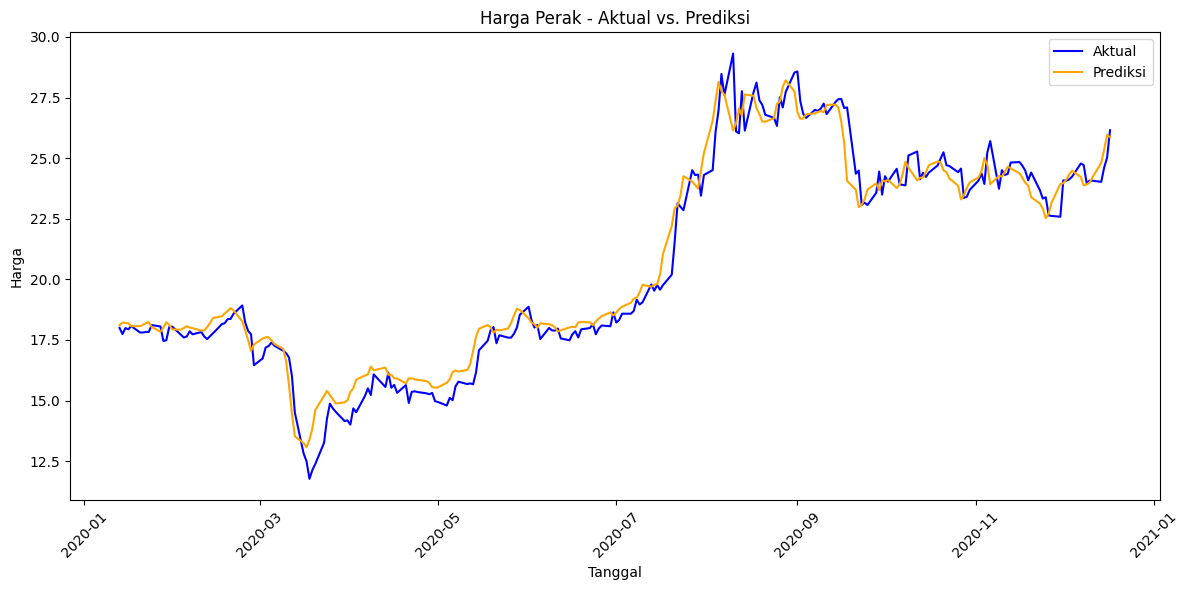

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, scaler.inverse_transform(y_test), label='Aktual', color='blue')
plt.plot(y_test.index, y_pred, label='Prediksi', color='orange')
plt.title('Harga Perak - Aktual vs. Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Ambil nilai terakhir dari data uji untuk membuat prediksi hari esok
last_row = x_test.iloc[-1][['t-1', 't-2', 't-3']].values.reshape(1, -1, 1)

# Prediksi harga untuk hari esok
predicted_value_normalized = model.predict(last_row)
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1))

# Ambil harga terakhir yang diketahui dari data aslinya
last_price = scaler.inverse_transform(y_test.iloc[-1].values.reshape(-1, 1))

# Hitung persentase perubahan dari harga terakhir ke harga prediksi
percentage_change = ((predicted_value[0][0] - last_price[0][0]) / last_price[0][0]) * 100

# Tentukan tanda perubahan
if percentage_change > 0:
    change_sign = '+'
else:
    change_sign = ''

# Tampilkan hasil prediksi
print(f'Harga perak hari ini: {last_price[0][0]:.2f}')
#print(f'Prediksi harga perak untuk hari esok: {predicted_value[0][0]:.2f} ({change_sign}{percentage_change:.2f}%)')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Harga perak hari ini: 18.00


#menggunakan lag 4

In [ ]:
#  sliding window
lags = [1, 2, 3, 4]
df_windowed4 = sliding_window_embedded(df_asli, lags)
df_windowed4.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Terakhir_Normalized,t-1,t-2,t-3,t-4
Tanggal,,,,,,,,,,,
2024-10-07,32.004,"32,450","32,595","31,655","55,63K","-1,20%",0.977769,0.909917,0.913300,0.940847,0.965349
2024-10-04,32.394,"32,290","33,225","31,755","86,41K","-0,22%",0.996617,0.977769,0.909917,0.913300,0.940847
2024-10-03,32.464,"32,100","32,485","31,650","56,40K","1,70%",1.000000,0.996617,0.977769,0.909917,0.913300
2024-10-02,31.920,"31,705","32,590","31,260","71,06K","0,56%",0.973710,1.000000,0.996617,0.977769,0.909917
2024-10-01,31.742,"31,420","32,145","31,380","61,99K","0,90%",0.965107,0.973710,1.000000,0.996617,0.977769


In [ ]:
lags_columns = df_windowed4[['t-1', 't-2', 't-3', 't-4','Terakhir_Normalized']]
lags_columns.head()

,t-1,t-2,t-3,t-4,Terakhir_Normalized
Tanggal,,,,,
2024-10-07,0.909917,0.913300,0.940847,0.965349,0.977769
2024-10-04,0.977769,0.909917,0.913300,0.940847,0.996617
2024-10-03,0.996617,0.977769,0.909917,0.913300,1.000000
2024-10-02,1.000000,0.996617,0.977769,0.909917,0.973710
2024-10-01,0.973710,1.000000,0.996617,0.977769,0.965107


pelajari manual LSTm 3 input 1 output

In [ ]:
# Split  data
input_df = df_windowed4[['t-1', 't-2', 't-3', 't-4']]
target_df = df_windowed4[['Terakhir_Normalized']]
train_size = 0.8

def split_data(data, target, train_size):
    split_index = int(len(data) * train_size)
    x_train = data[:split_index]
    y_train = target[:split_index]
    x_test = data[split_index:]
    y_test = target[split_index:]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_data(input_df, target_df, train_size)

print(f"Jumlah data pelatihan: {len(x_train)}")
print(f"Jumlah data pengujian: {len(x_test)}")
print(f"Ukuran data pelatihan: {x_train.shape}")
print(f"Ukuran data pengujian: {x_test.shape}")

Jumlah data pelatihan: 968
Jumlah data pengujian: 243
Ukuran data pelatihan: (968, 4)
Ukuran data pengujian: (243, 4)


In [ ]:
#LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import pickle

# Simpan model ke file .pkl
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke lstm_model.pkl")


Model berhasil disimpan ke lstm_model.pkl


In [ ]:
# 1. Ambil bobot sebelum training
print("Bobot sebelum training:")
for layer in model.layers:
    weights = layer.get_weights()  # Mendapatkan bobot dan bias
    if weights:  # Jika layer memiliki bobot
        print(f"{layer.name} - Bobot: {np.array(weights[0]).shape}, Bias: {np.array(weights[1]).shape}")


Bobot sebelum training:
lstm_2 - Bobot: (1, 200), Bias: (50, 200)
lstm_3 - Bobot: (50, 200), Bias: (50, 200)
dense_2 - Bobot: (50, 25), Bias: (25,)
dense_3 - Bobot: (25, 1), Bias: (1,)


In [ ]:
# compile dan melatih model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, batch_size=16, epochs=25)


Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1569
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2615e-04
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3932e-04
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8604e-04
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3555e-04
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2607e-04
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2813e-04
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0773e-04
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1126e-04
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2541e-04
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7412e-04
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.7546e-04
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 4, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [ ]:
# 2. Ambil bobot setelah training
print("\nBobot setelah training:")
for layer in model.layers:
    weights = layer.get_weights()  # Mendapatkan bobot dan bias
    if weights:  # Jika layer memiliki bobot
        print(f"{layer.name} - Bobot: {np.array(weights[0]).shape}, Bias: {np.array(weights[1]).shape}")


Bobot setelah training:
lstm_2 - Bobot: (1, 200), Bias: (50, 200)
lstm_3 - Bobot: (50, 200), Bias: (50, 200)
dense_2 - Bobot: (50, 25), Bias: (25,)
dense_3 - Bobot: (25, 1), Bias: (1,)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# buat prediksi
y_pred_scaled = model.predict(x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1))
y_pred = scaler.inverse_transform(y_pred_scaled)

# Hitung error
mse = mean_squared_error(scaler.inverse_transform(y_test), y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), y_pred) * 100

# Tampilkan  error
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f} %')



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error (MSE): 0.6252023841157911
Root Mean Squared Error (RMSE): 0.790697403635418
Mean Absolute Percentage Error (MAPE): 3.04 %


In [ ]:
# Ambil nilai terakhir dari data uji untuk membuat prediksi hari esok
last_row = x_test.iloc[-1][['t-1', 't-2', 't-3', 't-4']].values.reshape(1, -1, 1)

# Prediksi harga untuk hari esok
predicted_value_normalized = model.predict(last_row)
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1))

# Ambil harga terakhir yang diketahui dari data aslinya
last_price = scaler.inverse_transform(y_test.iloc[-1].values.reshape(-1, 1))

# Hitung persentase perubahan dari harga terakhir ke harga prediksi
percentage_change = ((predicted_value[0][0] - last_price[0][0]) / last_price[0][0]) * 100

# Tentukan tanda perubahan
if percentage_change > 0:
    change_sign = '+'
else:
    change_sign = ''

# Tampilkan hasil prediksi
print(f'Harga perak hari ini: {last_price[0][0]:.2f}')
#print(f'Prediksi harga perak untuk hari esok: {predicted_value[0][0]:.2f} ({change_sign}{percentage_change:.2f}%)')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Harga perak hari ini: 18.00


#LSTM dengan ensemble bagging

In [ ]:
# Fungsi untuk membuat dan melatih model LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Ensemble LSTM menggunakan Bagging
def bagging_lstm_ensemble(x_train, y_train, x_test, n_estimators=5, epochs=10, batch_size=16):
    predictions = []

    for i in range(n_estimators):
        print(f"Training model {i+1}/{n_estimators}")

        # Membuat model LSTM baru
        model = create_lstm_model(input_shape=(x_train.shape[1], 1))

        # Melatih model
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

        # Prediksi dengan model yang sudah dilatih
        y_pred = model.predict(x_test)

        # Simpan hasil prediksi
        predictions.append(y_pred)

    # Menggabungkan hasil prediksi dengan rata-rata
    ensemble_pred = np.mean(predictions, axis=0)

    return ensemble_pred

Training model 1/5
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1707
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8786e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3718e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3347e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8760e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7310e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3854e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Training model 2/5
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2386
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1350e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1111e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3405e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.6480e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9940e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5638e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1114e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Training model 3/5
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1801
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5824e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1833e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.4172e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9773e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8133e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6592e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.5877e-04


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Training model 4/5
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1782
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.5901e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6602e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5425e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.2216e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8676e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.0270e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7306e-04


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Training model 5/5
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2096
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7649e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.5028e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.5540e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9953e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6876e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5076e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6366e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


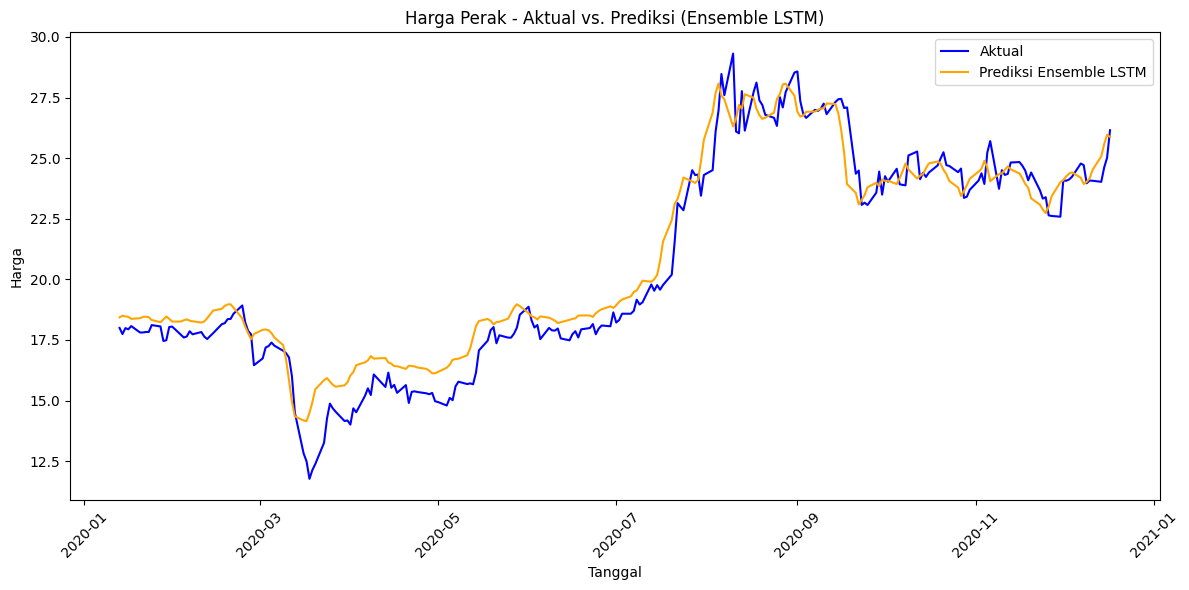

Mean Squared Error: 0.9424447062943082
Root Mean Squared Error: 0.9707959138224204
Mean Absolute Percentage Error (MAPE): 4.20 %


In [ ]:
# Reshape data untuk input LSTM
x_train_reshaped = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

# Latih dan prediksi menggunakan ensemble LSTM
ensemble_predictions_scaled = bagging_lstm_ensemble(x_train_reshaped, y_train, x_test_reshaped, n_estimators=5, epochs=10)

# Mengembalikan hasil prediksi ke skala asli
y_test_unscaled = scaler.inverse_transform(y_test)
ensemble_predictions_unscaled = scaler.inverse_transform(ensemble_predictions_scaled)

# Menghitung metrik error
mse = mean_squared_error(y_test_unscaled, ensemble_predictions_unscaled)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_unscaled - ensemble_predictions_unscaled) / y_test_unscaled)) * 100

# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test_unscaled, label='Aktual', color='blue')
plt.plot(y_test.index, ensemble_predictions_unscaled, label='Prediksi Ensemble LSTM', color='orange')
plt.title('Harga Perak - Aktual vs. Prediksi (Ensemble LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan metrik error
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f} %')


In [ ]:

# Ambil nilai terakhir dari data uji untuk membuat prediksi hari esok
last_row = x_test.iloc[-1][['t-1', 't-2', 't-3']].values.reshape(1, -1, 1)

# Prediksi harga untuk hari esok menggunakan model terakhir dari ensemble
predicted_value_normalized = np.mean([model.predict(last_row) for model in [create_lstm_model(input_shape=(x_train.shape[1], 1)) for _ in range(5)]], axis=0)

# Mengembalikan prediksi ke skala asli
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1))

# Ambil harga terakhir yang diketahui dari data aslinya
last_price = scaler.inverse_transform(y_test.iloc[-1].values.reshape(-1, 1))

# Hitung persentase perubahan dari harga terakhir ke harga prediksi
percentage_change = ((predicted_value[0][0] - last_price[0][0]) / last_price[0][0]) * 100

# Tentukan tanda perubahan
change_sign = '+' if percentage_change > 0 else ''

# Tampilkan hasil prediksi
print(f'Harga perak hari ini: {last_price[0][0]:.2f}')
#print(f'Prediksi harga perak untuk hari esok: {predicted_value[0][0]:.2f} ({change_sign}{percentage_change:.2f}%)')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Harga perak hari ini: 18.00


In [ ]:
# *** Bagian untuk memprediksi harga esok hari ***
# Input harga perak hari ini dan harga dari dua hari sebelumnya
sell_1 = float(input("Masukkan harga perak hari ini: "))  # Harga saat ini
sell_2 = float(input("Masukkan harga perak 1 hari yang lalu: "))  # Harga 1 hari yang lalu
sell_3 = float(input("Masukkan harga perak 2 hari yang lalu: "))  # Harga 2 hari yang lalu

# Siapkan data untuk prediksi
last_row = np.array([
    scaler.transform([[sell_1]]).flatten()[0],
    scaler.transform([[sell_2]]).flatten()[0],
    scaler.transform([[sell_3]]).flatten()[0]
]).reshape(1, -1)

# Prediksi harga esok hari menggunakan model ensemble
predicted_value_normalized = np.mean([model.predict(last_row) for model in [create_lstm_model(input_shape=(x_train.shape[1], 1)) for _ in range(5)]], axis=0)

# Invers transformasi untuk mendapatkan nilai prediksi dalam skala asli
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1))

# Ambil harga terakhir yang diketahui
last_price = sell_1

# Hitung persentase perubahan
percentage_change = ((predicted_value[0][0] - last_price) / last_price) * 100
change_sign = '+' if percentage_change > 0 else ''

# Format dan tampilkan hasil
formatted_predicted_value = f"{predicted_value[0][0]:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
formatted_last_price = f"{last_price:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

print(f'Harga perak saat ini: Rp {formatted_last_price}')
#print(f'Prediksi harga perak untuk esok hari: Rp {formatted_predicted_value} ({change_sign}{percentage_change:.2f}%)')


Masukkan harga perak hari ini: 95
Masukkan harga perak 1 hari yang lalu: 98
Masukkan harga perak 2 hari yang lalu: 99


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Harga perak saat ini: Rp 95,00


In [1]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import gradio as gr
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Fungsi untuk memuat model dan scaler
def load_resources():
    # Load model dan scaler (sesuaikan dengan path file model dan scaler)
    model = load_model('/content/drive/MyDrive/Colab Notebooks/project/model/lstm_model.h5')
    scaler = MinMaxScaler(feature_range=(0, 1))
    return model, scaler

# Fungsi untuk memprediksi harga perak berdasarkan input
def predict_price(input_data):
    try:
        # Memastikan input berupa angka (misalnya dalam bentuk string yang dipisahkan koma)
        input_data = [float(i) for i in input_data.split(',')]  # Memisahkan input berdasarkan koma
        input_data = np.array(input_data).reshape(-1, 1)

        # Memuat model dan scaler
        model, scaler = load_resources()

        # Melakukan normalisasi terhadap data input
        scaled_input = scaler.fit_transform(input_data)

        # Membuat prediksi menggunakan model LSTM
        predicted_price = model.predict(scaled_input)

        # Mengembalikan harga yang diprediksi
        predicted_price = scaler.inverse_transform(predicted_price)
        return f"Harga perak yang diprediksi: {predicted_price[0][0]:.2f} "
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Membuat antarmuka Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=gr.Textbox(label="Masukkan Data Harga Perak (time series) - pisahkan dengan koma"),
    outputs=gr.Textbox(label="Prediksi Harga Perak"),
    live=True,
    title="Prediksi Harga Perak Menggunakan LSTM"
)

# Menjalankan antarmuka
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://946f6bd42ad49d1181.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
